<------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------->
<-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------->

Implementation of logistic Regression on real dataset

In [22]:
# import libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


df = pd.read_csv("student-mat.csv", sep=";", quotechar='"')

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [23]:
# Create Binary Target: Pass/Fail

# Students with G3 >= 10 are considered Pass (1), else Fail (0)
df['Pass'] = (df['G3'] >= 10).astype(int)

In [24]:
#  Select Features

feature_cols = ['studytime', 'G2', 'failures', 'absences', 'G1']
X = df[feature_cols].values
y = df['Pass'].values

In [25]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
#  Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Train Logistic Regression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
# Interpret Coefficients

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Explain the coefficients
# Note: These are for the *scaled* features
feature_names = ['studytime', 'G2']
for i, name in enumerate(feature_names):
    print(f"Coefficient for {name}: {model.coef_[0][i]:.4f}")

print("\nInterpretation:")
print("The positive coefficients suggest that an increase in both 'studytime' and 'G2' score")
print("increases the log-odds (and thus the probability) of a student passing.")

Model Coefficients: [[-0.2958985   3.95319625 -0.09445943 -0.23277913  1.01971439]]
Model Intercept: [2.24982632]
Coefficient for studytime: -0.2959
Coefficient for G2: 3.9532

Interpretation:
The positive coefficients suggest that an increase in both 'studytime' and 'G2' score
increases the log-odds (and thus the probability) of a student passing.


In [29]:
# Predictions & Probabilities

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [30]:
# Evaluate Model

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

Accuracy: 0.9113924050632911

Confusion Matrix:
 [[26  1]
 [ 6 46]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88        27
           1       0.98      0.88      0.93        52

    accuracy                           0.91        79
   macro avg       0.90      0.92      0.91        79
weighted avg       0.92      0.91      0.91        79



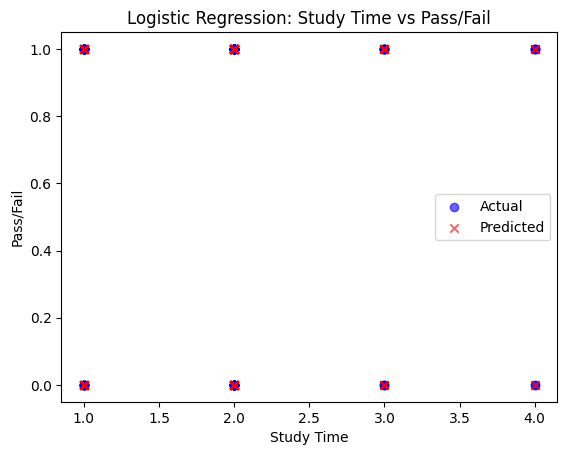

In [31]:
# Visualization

plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test[:, 0], y_pred, color='red', marker='x', label='Predicted', alpha=0.6)
plt.xlabel("Study Time")
plt.ylabel("Pass/Fail")
plt.title("Logistic Regression: Study Time vs Pass/Fail")
plt.legend()
plt.show()

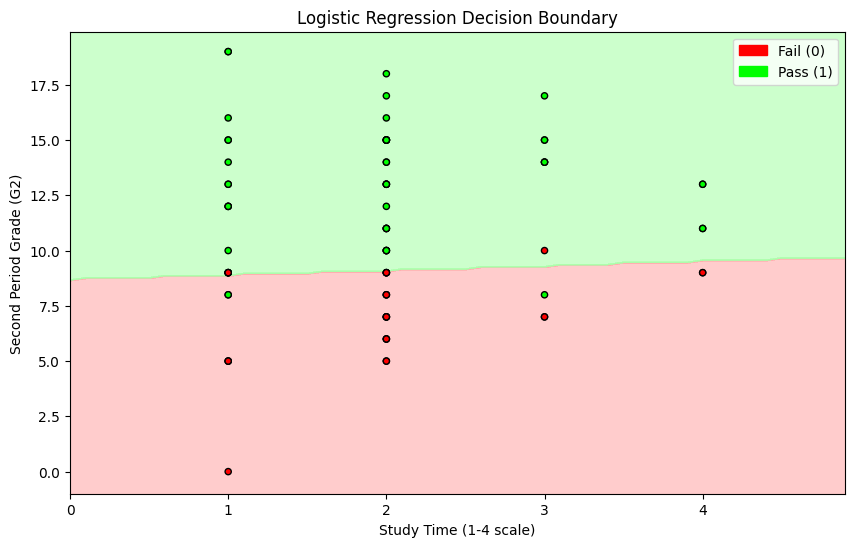

In [ ]:
# Decision Boundary

from matplotlib.colors import ListedColormap

# Create a meshgrid to plot the decision boundary
# Use unscaled data for the grid ranges for easier interpretation
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# We need to scale the grid data just like we scaled the training data
grid_data = np.c_[xx.ravel(), yy.ravel()]
grid_scaled = scaler.transform(grid_data)

# Predict the class for each point on the grid
Z = model.predict(grid_scaled)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA']) # Colors for Fail/Pass regions
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

# Plot the actual data points from the test set
cmap_bold = ListedColormap(['#FF0000', '#00FF00']) # Colors for Fail/Pass points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=20)

# Labels and title
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Study Time (1-4 scale)')
plt.ylabel('Second Period Grade (G2)')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Create a legend
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='#FF0000', label='Fail (0)')
green_patch = mpatches.Patch(color='#00FF00', label='Pass (1)')
plt.legend(handles=[red_patch, green_patch])

plt.show()